<a href="https://colab.research.google.com/github/lis-r-barreto/analise-de-dados-com-python-e-pandas/blob/main/04_Manipulando_e_Visualizando_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalhando com Planilhas do Excel**

In [67]:
# Importando a biblioteca
import pandas as pd

In [68]:
# Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [69]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [70]:
# Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [71]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [72]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [73]:
# Obtendo uma amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
96,Fortaleza,2019-01-01,23.31,1004,4
217,Salvador,2019-01-02,37.65,1036,2
67,Salvador,2019-01-01,36.89,1037,2
88,Recife,2019-01-01,180.24,980,6
93,Fortaleza,2019-01-01,35.25,1003,5


In [74]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [75]:
df["LojaID"] = df["LojaID"].astype("object")

In [76]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

### **Tratando valores faltantes**

In [77]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [78]:
df["Vendas"].mean()

122.61180089485438

In [79]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [80]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [131]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_vendas
39,Natal,2019-01-10,504.00,854,3,1512.00,3.0,2019,1,10,374 days,1
70,Aracaju,2018-01-01,8.44,1523,9,75.96,9.0,2018,1,1,0 days,1
104,Recife,2019-01-01,40.11,983,5,200.55,5.0,2019,1,1,365 days,1
62,Natal,2018-02-10,793.00,854,4,3172.00,4.0,2018,2,10,40 days,1
109,Salvador,2019-03-02,124.37,1035,1,124.37,1.0,2019,3,2,425 days,1


In [82]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [83]:
# Apagando as linhas com os valores nulos com base apenas em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [84]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

### **Criando colunas novas**

In [85]:
# Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [86]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [87]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [88]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [89]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [90]:
df["Receita"].min()

3.34

In [91]:
# Descobrindo a 3 maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [92]:
# Descobrindo a 3 menores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [93]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [94]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


### **Trabalhando com datas**

In [95]:
#Transformando a coluna em data do tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [96]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [97]:
df["Data"] = pd.to_datetime(df["Data"])

In [98]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [99]:
# Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [100]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [101]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
31,Salvador,2019-01-01,202.25,1035,2,404.50,2.0,2019
73,Salvador,2019-01-01,8.39,1037,1,8.39,1.0,2019
73,Recife,2019-01-01,39.71,981,5,198.55,5.0,2019
107,Aracaju,2018-01-01,142.57,1523,3,427.71,3.0,2018
138,Recife,2019-03-02,150.38,983,6,902.28,6.0,2019


In [103]:
# Extraindo o mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [136]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_vendas
35,Salvador,2019-01-01,241.45,1037,1,241.45,1.0,2019,1,1,365 days,1
78,Recife,2019-01-01,238.73,980,3,716.19,3.0,2019,1,1,365 days,1
73,Recife,2019-01-01,39.71,981,5,198.55,5.0,2019,1,1,365 days,1
230,Natal,2019-01-03,184.69,1036,1,184.69,1.0,2019,1,3,367 days,1
71,Salvador,2019-01-01,21.36,1035,2,42.72,2.0,2019,1,1,365 days,1


In [109]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [110]:
# Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [111]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias
102,Natal,2019-01-02,40.84,1034,3,122.52,3.0,2019,1,2,366 days
50,Fortaleza,2019-01-01,33.69,1005,3,101.07,3.0,2019,1,1,365 days
150,Natal,2019-01-02,11.13,1035,2,22.26,2.0,2019,1,2,366 days
130,Salvador,2019-03-02,59.78,1036,1,59.78,1.0,2019,3,2,425 days
126,Salvador,2019-03-02,41.69,1036,2,83.38,2.0,2019,3,2,425 days


In [112]:
# Criando a coluna de trimestre
df["trimestre_vendas"] = df["Data"].dt.quarter

In [113]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_vendas
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,3,367 days,1
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,2019,3,10,433 days,1
38,Fortaleza,2019-01-01,35.09,1004,4,140.36,4.0,2019,1,1,365 days,1
42,Fortaleza,2019-01-01,38.71,1004,5,193.55,5.0,2019,1,1,365 days,1
76,Fortaleza,2019-01-01,38.61,1004,4,154.44,4.0,2019,1,1,365 days,1


In [114]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) &(df["Data"].dt.month == 3)]

In [115]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


### **Visualização de dados**

In [116]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

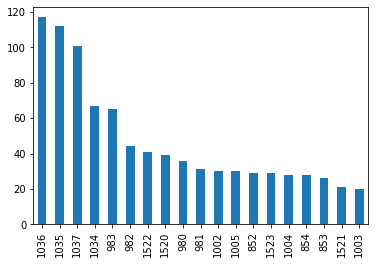

In [119]:
# Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

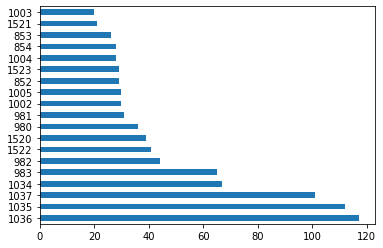

In [122]:
# Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh();

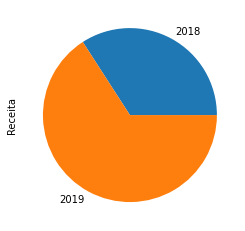

In [123]:
# Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [124]:
# Total de vendas por cidade
df["Cidade"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Aracaju
1       Aracaju
2       Aracaju
3       Aracaju
4       Aracaju
         ...   
235    Salvador
236    Salvador
237    Salvador
238    Salvador
239    Salvador
Name: Cidade, Length: 894, dtype: object>

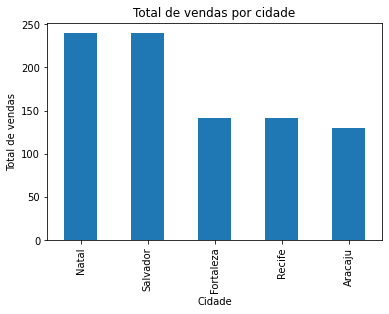

In [127]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

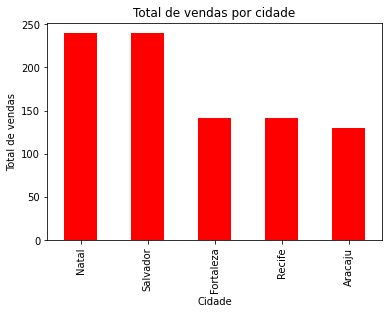

In [128]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [129]:
# Alterando o estilo
plt.style.use("ggplot")

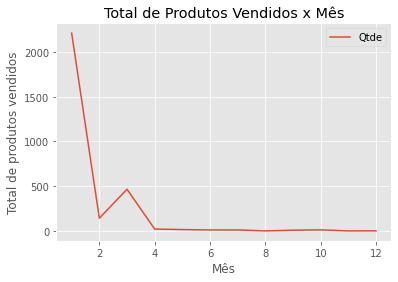

In [133]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [134]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [137]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

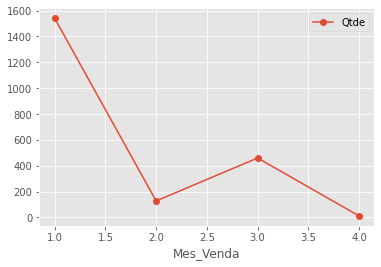

In [140]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="o")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend();

In [139]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

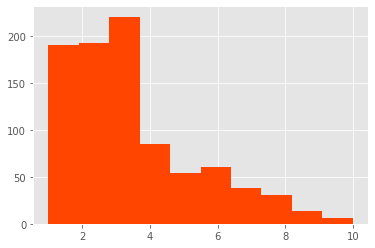

In [143]:
# Histograma
plt.hist(df["Qtde"], color="orangered");

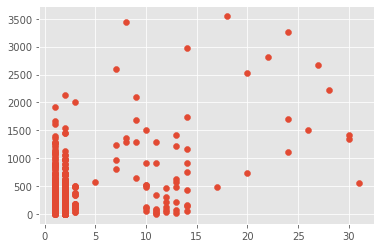

In [144]:
# Gráfico de dispersão
plt.scatter(x = df_2019["Dia_Venda"], y = df_2019["Receita"]);

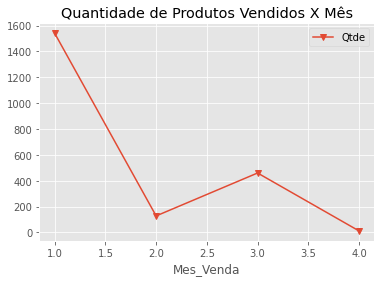

In [147]:
# Salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de Produtos Vendidos X Mês")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend()
plt.savefig("grafico qtde x mes.png")